<a href="https://colab.research.google.com/github/shubhambhatt01/Task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intern : Shubham Bhatt 

Task 1 : Prediction using supervised ML

Aim : To predict the percentage of a student based on the number of hours studied.

In [ ]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#READING THE DATA
source = 'http://bit.ly/w-data'
data = pd.read_csv(source)
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


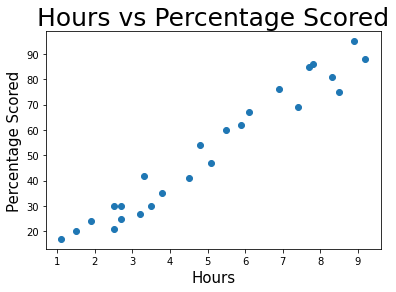

In [ ]:
#INTRODUCING DEPENDENT AND INDEPENDENT VARIABLE AND VISUALIZING THE DATASET
y = data['Scores']
xo = data['Hours']
plt.scatter(xo,y)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Percentage Scored',fontsize=15)
plt.title('Hours vs Percentage Scored',fontsize=25)
plt.show()

In [ ]:
#SEPARATING THE VARIABLES FOR REGRESSION 
xo = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
#SPLIT TRAINING AND TESTING DATA TO CHECK FOR OVERFITTING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xo,y,train_size = 0.5,random_state=12)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(12, 1)
(12,)
(13, 1)
(13, 1)


In [ ]:
#PERFORMING LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

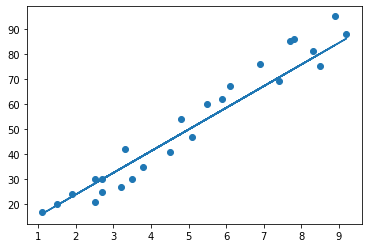

In [ ]:
#PLOTTING THE LINEAR REGRESSION LINE
slope = reg.coef_
intercept = reg.intercept_
regline = slope*xo + intercept
plt.scatter(xo,y)
plt.plot(xo,regline)
plt.show()

In [ ]:
#PERFORMING THE REGRESSION ON TEST DATA AND COMPARING ACCURACY WITH TRAIN ACCURACY 
a = reg.score(x_train,y_train)*100
b = reg.score(x_test,y_test)*100
print("Training Accuracy = ",a)
print("Test Accuracy = ",b)

Training Accuracy =  95.6498218232294
Test Accuracy =  91.10662335632762


In [ ]:
#COMPARING THE ACTUAL AND PREDICTED VALUES
y_predicted = reg.predict(x_test)
df = pd.DataFrame({"y_Actual" : y_test, "y_Predicted" : y_predicted})
df

,y_Actual,y_Predicted
0,69,70.572027
1,60,54.171969
2,67,59.350935
3,47,50.719325
4,95,83.519442
5,81,78.340476
6,30,36.908750
7,17,16.192887
8,35,39.498233
9,21,28.277140


In [ ]:
#EVALUATING THE MODEL 
from sklearn import metrics
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_predicted))
print("The R^2 value is : ", reg.score(x_test,y_test))

Mean Squared Error :  57.517518766472854
Mean Absolute Error :  6.612104851527608
The R^2 value is :  0.9110662335632762


EXAMPLE : STUDENT STUDIES FOR 9.25 HOURS, PREDICT THE SCORE

In [ ]:
pred = reg.predict([[9.25]])
print("\033[1m" + "Conclusion : ")
print("For 9.25 hours of study per day, the predicted score of the student is",pred[0])

Conclusion : 
For 9.25 hours of study per day, the predicted score of the student is 86.54050508363397
